# Q? Human Pose Estimation with Convolutional Pose Machines (CPM)

In this question, you will be given code adapted from [PyTorch implementation of one of the CPM model [1]](https://github.com/Hzzone/pytorch-openpose), which is an follow-up work of the original Convolution Pose Machine [2], and shares the Part Confidence Maps estimation module with [2]. In this question you will be given a trained CPM model and gain insights about the model design and outputs.

- ``cd pytorch-openpose``
- Set up the environment following the instructions at ``pytorch-openpose/README.md`` (Getting Started - Install Requriements)
- Download the ``body_pose_model.pth`` from [Dropbox](https://www.dropbox.com/sh/7xbup2qsn7vvjxo/AABWFksdlgOMXR_r5v3RwKRYa?dl=0) and place under ``pytorch-openpose/model``

(1) Run the inference code on the given image, and report the output keypoint detection result. Answer the question: what is the ratio of size $\lambda=H/H'$ between the input image **im** (Line 57 of ``body.py``) of shape [1, 3, H, W] and the output heatmap **heatmap_0** of shape [1, D, H', W']? And what module in the model is reponsible for this scaling?

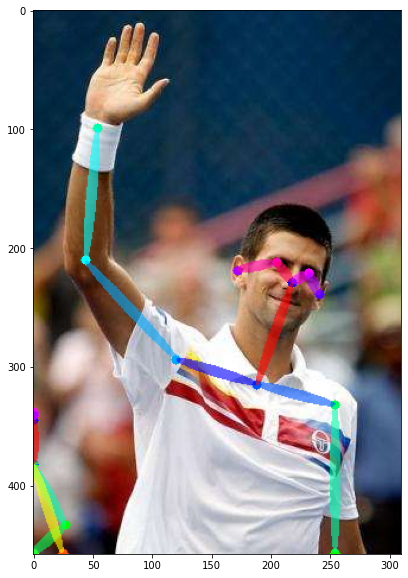

In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

body_estimation = Body('model/body_pose_model.pth')

test_image = 'images/demo.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset, heatmap_list, heatmap_list_converted_list = body_estimation(oriImg)
heatmap_0 = heatmap_list[0] 
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.figure(figsize=(10, 10))
plt.imshow(canvas[:, :, 
                  [2, 1, 0]])
# plt.axis('off')
plt.show()

``Paste the output figure here``

``Answer the two questions here``

(2) ``heatmap_list_converted_list[0]`` is a list of heatmaps from all 6 layers: [out1_2, out2_2, out3_2, out4_2, out5_2, out6_2], where the output of each layer is of shape [H, W, D]. Please answer: [1] What is D? And given D can you tell what is the number of keypoints that the model is trying to estimate? [2] Visualize and compare the heatmap from **layer_idx=0** and **layer_idx=5** for the keypoint **d=2**. Do the same thing for **d=3**. What shared difference can you spot in these comparisons? And justy why the difference (you may get some hint from the model design).

This snippet gives the function to visualize the $d_{th}$ feature map from the layer **layer_idx**

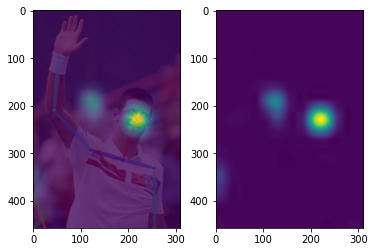

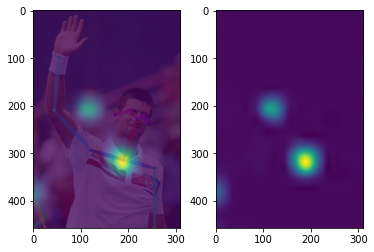

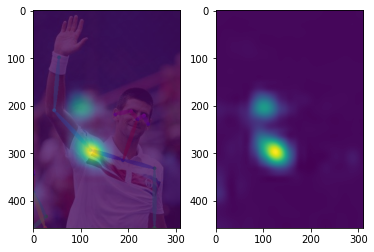

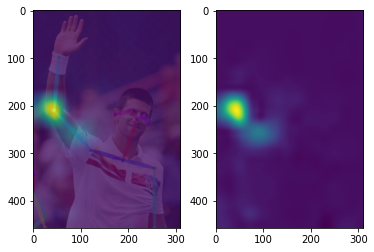

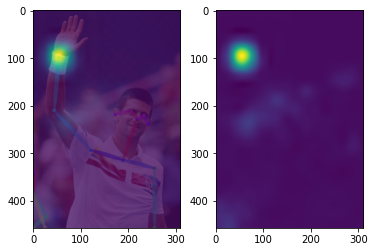

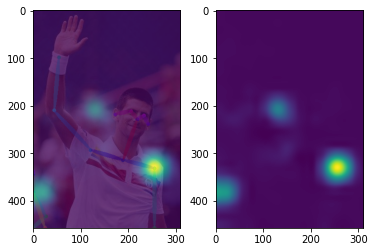

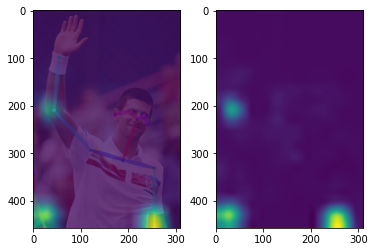

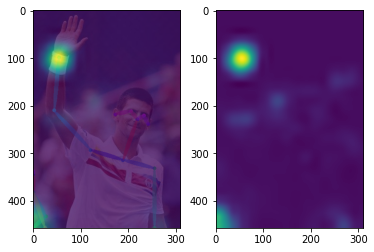

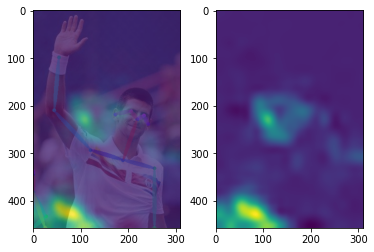

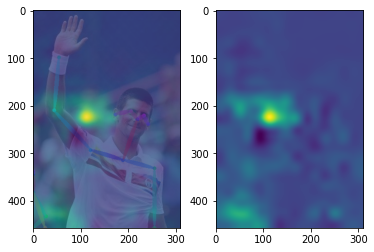

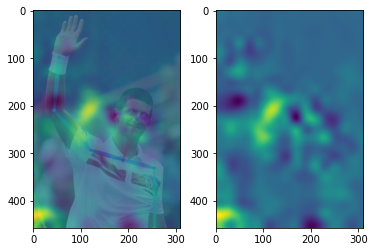

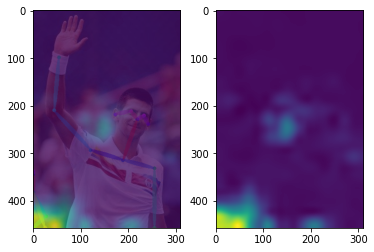

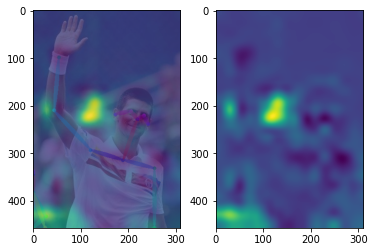

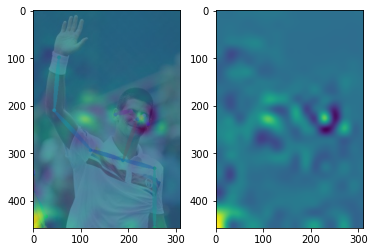

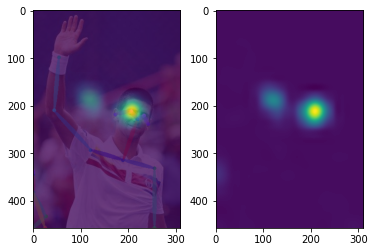

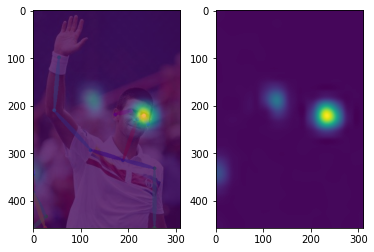

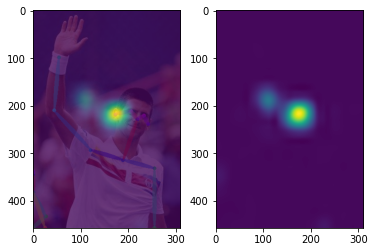

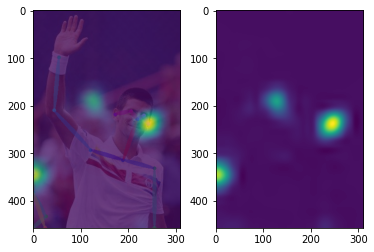

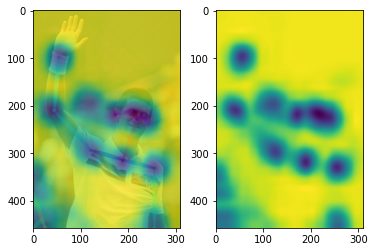

In [3]:
layer_idx = -1

for d in range(heatmap_list_converted_list[0][layer_idx].shape[2]):
    layer_idx = 0
    heatmap = heatmap_list_converted_list[0][layer_idx][:, :, d]
    util.overlay_heatmap(canvas, heatmap)

``Answer [1] here``

``Answer [2] here (paste the visualizations and justify the difference)``

(c) Set **multi_scale=False** in Line 38 of ``body.py`` and re-run the code from (a); paste below. Do the same comparison with additional images of ``demo_coco.jpg``, ``demo_coco2.jpg``, ``demo_beach.jpg``, ``demo_ucsd.jpg``, ``demo_ucsd2.jpg``. What shared difference can you spot in most of the comparisons? Why do think this difference might result from? 'Justify the difference. **NOTE: you might need to restart the kernel each time you change the multi_scale flag. This may be required to re-initialize the model. [Kernel]-->[Restart]**

``Paste figure by re-running (a) with multi_scale=False here``

``For each of the additional images, paste two figures with multi_scale=True and multi_scale=False respectively here``

``Report the difference and jsutify here``

# Reference
[1] Cao, Zhe, et al. "Realtime multi-person 2d pose estimation using part affinity fields." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2017.

[2] Wei, Shih-En, et al. "Convolutional pose machines." Proceedings of the IEEE conference on Computer Vision and Pattern Recognition. 2016.

In [2]:
heatmap_list_converted_list[0][0].shape

(458, 310, 19)

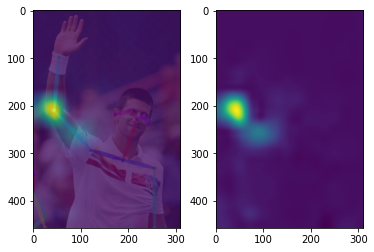

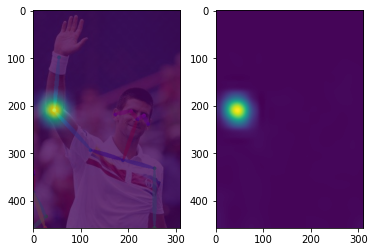

In [13]:
kps_idx = 3



heatmap = heatmap_list_converted_list[0][0][:, :, kps_idx]
util.overlay_heatmap(canvas, heatmap)

heatmap = heatmap_list_converted_list[0][-1][:, :, kps_idx]
util.overlay_heatmap(canvas, heatmap)